In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import time
from functions import basic
from functions import interaction
from functions import evolution
%matplotlib inline

In [2]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython){
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [3]:
# reading input file
filename = "fcc100a256.txt"
lattice = basic.read_file(filename)

In [4]:
# computing ditances, finding neighbours

# no PBC test
start = time.process_time()
for i in range(100):
    mask,distances = basic.find_neighbours(*lattice)
print(f'no PBC - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

start = time.process_time()
for i in range(100):
    mask,distances = basic.find_neighbours(*lattice, PBC=True)
print(f'PBC - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

no PBC - 100 iterations; computing time: 0.56 seconds
PBC - 100 iterations; computing time: 0.59 seconds


In [5]:
# calculating potential energy
mask,distances = basic.find_neighbours(*lattice)

# approximate LJ
start = time.process_time()
for i in range(100):
    LJA = interaction.lennard_jones_approx(distances)
print(f'approximate LJ - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

# true LJ
start = time.process_time()
for i in range(100):
    LJ = interaction.lennard_jones(distances)
print(f'true LJ - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

print('')
print(f'approximate LJ: {LJA:.2f}')
print(f'true LJ: {LJ:.2f}')

/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:44: RuntimeWarning: divide by zero encountered in true_divide
  Epot_rp = 4*epsilon*((sigma/(mask_rp*distances))**12 - (sigma/(mask_rp*distances))**6)
/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:44: RuntimeWarning: invalid value encountered in subtract
  Epot_rp = 4*epsilon*((sigma/(mask_rp*distances))**12 - (sigma/(mask_rp*distances))**6)
/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:45: RuntimeWarning: invalid value encountered in multiply
  Epot_rc = Apoli7*mask_rc + Bpoli7*mask_rc*distances + Cpoli7*((mask_rc*distances)**2) + Dpoli7*((mask_rc*distances)**3) + Epoli7*((mask_rc*distances)**4) + Fpoli7*((mask_rc*distances)**5) + Gpoli7*((mask_rc*distances)**6) + Hpoli7*((mask_rc*distances)**7)
/home/demetrio/git_repo/molecular_dynamics/functions/interaction.py:44: RuntimeWarning: invalid value encountered in multiply
  Epot_rp = 4*epsilon*((sigma/(mask_rp*distances))**12 -

approximate LJ - 100 iterations; computing time: 0.75 seconds
true LJ - 100 iterations; computing time: 0.82 seconds

approximate LJ: -453.45
true LJ: -532.48


In [17]:
# calculating forces

# approximate LJ
start = time.process_time()
for i in range(100):
    FxA,FyA,FzA = interaction.calc_force_approx(*lattice,distances,PBC=True)
print(f'approximate LJ - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

# approximate LJ
start = time.process_time()
for i in range(100):
    Fx,Fy,Fz = interaction.calc_force(*lattice,distances,PBC=True)
print(f'true LJ - 100 iterations; computing time: {time.process_time() - start :.2f} seconds')

print('')
print(f'approximate LJ, force on 0-th atom: {FxA[1]:.2f},{FyA[1]:.2f},{FzA[1]:.2f}')
print(f'true LJ, force on 0-th atom: {Fx[1]:.2f},{Fy[1]:.2f},{Fz[1]:.2f}')

approximate LJ - 100 iterations; computing time: 2.64 seconds
true LJ - 100 iterations; computing time: 2.96 seconds

approximate LJ, force on 0-th atom: 0.00,0.00,0.00
true LJ, force on 0-th atom: 0.09,0.09,0.09


In [7]:
for i in range(10):
    print(lattice[4][i],lattice[5][i],lattice[6][i])
    print(f'ALJ, force on {i}-th atom: [{FxA[i]:.3f},{FyA[i]:.3f},{FzA[i]:.3f}]')
    print(f'TLJ, force on {i}-th atom: [{Fx[i]:.3f},{Fy[i]:.3f},{Fz[i]:.3f}]\n')

2.0802 2.0802 0.0
ALJ, force on 0-th atom: [0.114,0.114,-0.113]
TLJ, force on 0-th atom: [0.209,0.209,0.099]

0.0 0.0 0.0
ALJ, force on 1-th atom: [0.000,0.000,0.000]
TLJ, force on 1-th atom: [0.092,0.092,0.095]

0.0 4.1604 0.0
ALJ, force on 2-th atom: [-0.056,-0.000,-0.056]
TLJ, force on 2-th atom: [0.106,0.017,0.109]

2.0802 6.2406 0.0
ALJ, force on 3-th atom: [0.114,0.000,-0.113]
TLJ, force on 3-th atom: [0.223,-0.004,0.143]

0.0 8.3208 0.0
ALJ, force on 4-th atom: [-0.056,-0.000,-0.056]
TLJ, force on 4-th atom: [0.110,-0.003,0.113]

2.0802 10.401 0.0
ALJ, force on 5-th atom: [0.114,-0.000,-0.113]
TLJ, force on 5-th atom: [0.221,-0.024,0.138]

0.0 12.4812 0.0
ALJ, force on 6-th atom: [-0.056,-0.114,-0.056]
TLJ, force on 6-th atom: [0.081,-0.176,0.084]

2.0802 14.5614 0.0
ALJ, force on 7-th atom: [0.114,0.056,-0.056]
TLJ, force on 7-th atom: [0.176,-0.073,0.084]

4.1604 0.0 0.0
ALJ, force on 8-th atom: [-0.000,-0.056,-0.056]
TLJ, force on 8-th atom: [0.017,0.106,0.109]

6.2406 2.0802

### Test zone - used for quick tests and monkey patch

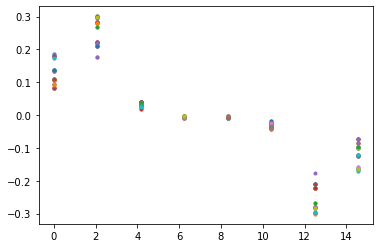

In [8]:
for i in range(255):
    plt.plot(lattice[4][i],Fx[i],'.')
    
plt.show()

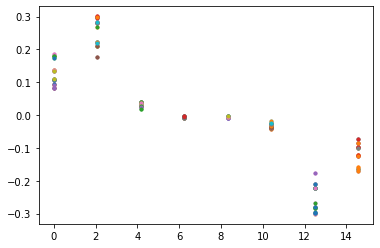

In [9]:
for i in range(255):
    plt.plot(lattice[5][i],Fy[i],'.')
    
plt.show()

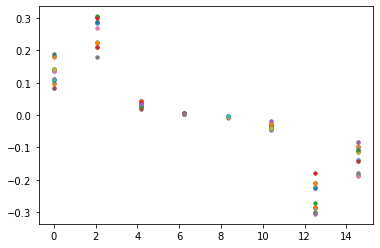

In [10]:
for i in range(255):
    plt.plot(lattice[6][i],Fz[i],'.')
    
plt.show()

In [11]:
n_atoms,sx,sy,sz,x,y,z = lattice
coord_x =  np.column_stack((x,np.zeros(n_atoms),np.zeros(n_atoms)))
coord_y =  np.column_stack((np.zeros(n_atoms),y,np.zeros(n_atoms)))
coord_z =  np.column_stack((np.zeros(n_atoms),np.zeros(n_atoms),z))
x_distances = np.sum(coord_x[:,None,:] - coord_x, axis=-1)
y_distances = np.sum(coord_y[:,None,:] - coord_y, axis=-1)        
z_distances = np.sum(coord_z[:,None,:] - coord_z, axis=-1)

In [12]:
x[0]

2.0802

In [13]:
coord_x[-10:]

array([[10.401 ,  0.    ,  0.    ],
       [ 8.3208,  0.    ,  0.    ],
       [ 6.2406,  0.    ,  0.    ],
       [ 4.1604,  0.    ,  0.    ],
       [ 2.0802,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ],
       [14.5614,  0.    ,  0.    ],
       [12.4812,  0.    ,  0.    ],
       [14.5614,  0.    ,  0.    ],
       [12.4812,  0.    ,  0.    ]])

In [14]:
x_distances[0][-10:]

array([ -8.3208,  -6.2406,  -4.1604,  -2.0802,   0.    ,   2.0802,
       -12.4812, -10.401 , -12.4812, -10.401 ])

In [15]:
mask_x_plus = x_distances>(0.5*sx)
mask_y_plus = y_distances>(0.5*sy)
mask_x_minus = x_distances<(-0.5*sx)
mask_y_minus = y_distances<(-0.5*sy)
x_distances = x_distances - sx*mask_x_plus + sx*mask_x_minus
y_distances = y_distances - sy*mask_y_plus + sy*mask_y_minus

In [16]:
x_distances[0][-10:]

array([-8.3208, -6.2406, -4.1604, -2.0802,  0.    ,  2.0802,  4.1604,
        6.2406,  4.1604,  6.2406])